In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import fetch_20newsgroups, fetch_20newsgroups_vectorized
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
news = fetch_20newsgroups()

In [4]:
news.keys()

dict_keys(['description', 'DESCR', 'target_names', 'target', 'data', 'filenames'])

In [5]:
news_df = pd.DataFrame()
news_df['text'] = news.data
news_df['group_num'] = news.target
news_df['group'] = (news_df['group_num']
                    .apply(lambda x: news['target_names'][x]))

In [6]:
news_df.sample(5)

,text,group_num,group
10977,From: oz@ursa.sis.yorku.ca (Ozan S. Yigit)\nSu...,17,talk.politics.mideast
5513,From: mikey@ccwf.cc.utexas.edu (Strider)\nSubj...,16,talk.politics.guns
7509,From: sysmgr@king.eng.umd.edu (Doug Mohney)\nS...,14,sci.space
1948,From: npet@bnr.ca (Nick Pettefar)\nSubject: Re...,8,rec.motorcycles
6159,From: jfw@ksr.com (John F. Woods)\nSubject: Re...,14,sci.space


In [7]:
news_df['group'].unique()

array(['rec.autos', 'comp.sys.mac.hardware', 'comp.graphics', 'sci.space',
       'talk.politics.guns', 'sci.med', 'comp.sys.ibm.pc.hardware',
       'comp.os.ms-windows.misc', 'rec.motorcycles', 'talk.religion.misc',
       'misc.forsale', 'alt.atheism', 'sci.electronics', 'comp.windows.x',
       'rec.sport.hockey', 'rec.sport.baseball', 'soc.religion.christian',
       'talk.politics.mideast', 'talk.politics.misc', 'sci.crypt'], dtype=object)

In [8]:
news_df.shape

(11314, 3)

In [9]:
tfidf_vectorizer = TfidfVectorizer(min_df = 1, stop_words = 'english')
document_term_matrix = tfidf_vectorizer.fit_transform(news_df['text'])

In [10]:
document_term_matrix

<11314x129796 sparse matrix of type '<class 'numpy.float64'>'
	with 1300729 stored elements in Compressed Sparse Row format>

In [ ]:
SVD = TruncatedSVD(20)
latent_semantic_analysis = SVD.fit_transform(document_term_matrix)

In [1]:
search_term = "Apollo Mission"

In [11]:
search_term_vec = tfidf_vectorizer.transform([search_term])
search_term_lsa = SVD.transform(search_term_vec)

In [12]:
cosine_similarities = latent_semantic_analysis.dot(search_term_lsa.T).ravel()

In [13]:
cosine_similarities.argsort()[:-6:-1]

array([ 4425,  9096, 11088,  8630,  2800])

In [14]:
print(news_df.loc[4425]['text'][:500])

From: leech@cs.unc.edu (Jon Leech)
Subject: Space FAQ 08/15 - Addresses
Supersedes: <addresses_730956515@cs.unc.edu>
Organization: University of North Carolina, Chapel Hill
Lines: 230
Distribution: world
Expires: 6 May 1993 19:58:29 GMT
NNTP-Posting-Host: mahler.cs.unc.edu
Keywords: Frequently Asked Questions

Archive-name: space/addresses
Last-modified: $Date: 93/04/01 14:38:55 $

CONTACTING NASA, ESA, AND OTHER SPACE AGENCIES/COMPANIES

Many space activities center around large Government or I


In [15]:
"Apollo" in news_df.loc[4425]['text']

False

In [16]:
print(news_df.loc[9096]['text'][:1000])

Subject: Space FAQ 01/15 - Introduction
From: leech@cs.unc.edu (Jon Leech)
Expires: 6 May 1993 19:53:44 GMT
Organization: University of North Carolina, Chapel Hill
Keywords: Frequently Asked Questions
Supersedes: <intro_730956346@cs.unc.edu>
NNTP-Posting-Host: mahler.cs.unc.edu
Lines: 310

Archive-name: space/intro
Last-modified: $Date: 93/04/01 14:39:10 $

    FREQUENTLY ASKED QUESTIONS ON SCI.SPACE/SCI.ASTRO

    INTRODUCTION

    This series of linked messages is periodically posted to the Usenet
groups sci.space and sci.astro in an attempt to provide good answers to
frequently asked questions and other reference material which is worth
preserving. If you have corrections or answers to other frequently asked
questions that you would like included in this posting, send email to
leech@cs.unc.edu (Jon Leech).

    If you don't want to see the FAQ, add 'Frequently Asked Questions' to
your KILL file for this group (if you're not reading this with a newsreader
that can kill articles by su

In [17]:
news_df.groupby('group').count()

,text,group_num
group,,
alt.atheism,480,480
comp.graphics,584,584
comp.os.ms-windows.misc,591,591
comp.sys.ibm.pc.hardware,590,590
comp.sys.mac.hardware,578,578
comp.windows.x,593,593
misc.forsale,585,585
rec.autos,594,594
rec.motorcycles,598,598


In [18]:
KNN = KNeighborsClassifier()
gs = GridSearchCV(KNN, param_grid={'n_neighbors':range(2,20)})
gs.fit(latent_semantic_analysis, news_df['group_num'])

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(2, 20)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [19]:
gs_res_df = pd.DataFrame(gs.cv_results_)
gs_res_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
mean_fit_time,0.0105559,0.0104996,0.0120105,0.0103611,0.0108833,0.010136,0.010355,0.00981832,0.0106159,0.011643,0.0107543,0.0112865,0.00978502,0.0101595,0.0124672,0.0103759,0.00962996,0.00967844
mean_score_time,0.621968,0.634648,0.945882,0.889081,0.801124,0.766714,0.801355,0.764833,0.771571,0.791871,0.876664,0.817658,0.822813,0.833894,0.913665,0.849373,0.827763,0.840447
mean_test_score,0.59855,0.619763,0.623652,0.633817,0.636468,0.638147,0.637264,0.639562,0.637617,0.639296,0.638236,0.637175,0.636203,0.636026,0.635673,0.635849,0.634082,0.635496
mean_train_score,0.811296,0.790392,0.771875,0.761137,0.748543,0.738333,0.730777,0.723308,0.716104,0.710404,0.706426,0.702847,0.698251,0.692815,0.690649,0.688882,0.684728,0.683932
param_n_neighbors,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
params,{'n_neighbors': 2},{'n_neighbors': 3},{'n_neighbors': 4},{'n_neighbors': 5},{'n_neighbors': 6},{'n_neighbors': 7},{'n_neighbors': 8},{'n_neighbors': 9},{'n_neighbors': 10},{'n_neighbors': 11},{'n_neighbors': 12},{'n_neighbors': 13},{'n_neighbors': 14},{'n_neighbors': 15},{'n_neighbors': 16},{'n_neighbors': 17},{'n_neighbors': 18},{'n_neighbors': 19}
rank_test_score,18,17,16,15,8,4,6,1,5,2,3,7,9,10,12,11,14,13
split0_test_score,0.598411,0.618543,0.617219,0.630464,0.627815,0.630199,0.632053,0.632583,0.634172,0.636821,0.635497,0.634172,0.629404,0.628079,0.629139,0.629934,0.629669,0.629139
split0_train_score,0.812442,0.795198,0.774241,0.764027,0.754079,0.740284,0.737366,0.72755,0.721714,0.716806,0.711633,0.709908,0.704337,0.696644,0.693593,0.697042,0.689216,0.689083
split1_test_score,0.604294,0.627617,0.631858,0.639544,0.645905,0.652001,0.64723,0.650411,0.64776,0.649086,0.6467,0.64246,0.643255,0.644845,0.644315,0.64458,0.641399,0.64458


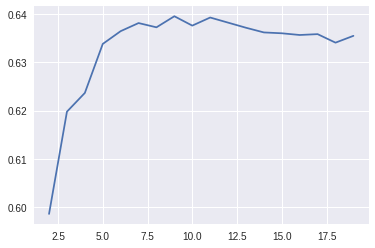

In [20]:
plt.plot(gs_res_df['param_n_neighbors'], gs_res_df['mean_test_score'])

In [21]:
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [22]:
gs.predict(search_term_lsa)

array([2])

In [23]:
news.keys()

dict_keys(['description', 'filenames', 'data', 'DESCR', 'target', 'target_names'])

In [24]:
news['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [25]:
SVD = TruncatedSVD(200)
latent_semantic_analysis = SVD.fit_transform(document_term_matrix)

<Container object of 200 artists>

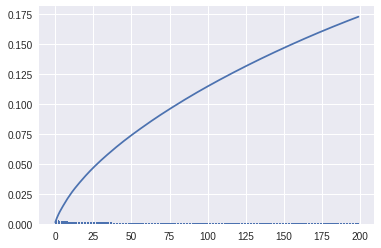

In [26]:
evr = SVD.explained_variance_ratio_
x = list(range(len(evr)))
plt.plot(x, np.cumsum(evr))
plt.bar(x, evr)

In [28]:
news_df.to_pickle('news.p')

In [29]:
type(document_term_matrix)

scipy.sparse.csr.csr_matrix

In [14]:
import scipy.sparse as sparse
import scipy.io
import numpy as np

def save_sparse_matrix(filename, x):
    x_coo = x.tocoo()
    row = x_coo.row
    col = x_coo.col
    data = x_coo.data
    shape = x_coo.shape
    np.savez(filename, row=row, col=col, data=data, shape=shape)

In [15]:
save_sparse_matrix('dtm', document_term_matrix)

In [16]:
save_sparse_matrix('apollo', search_term_vec)

In [18]:
from sklearn.externals import joblib

In [19]:
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer')

['tfidf_vectorizer']